In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [39]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Concatenate, Input
import random
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
cm= {0:'v',1: 'yo', 2: 'palm', 3: 'nameste',4:'thumbsup',5:'thumbsdown'}

In [41]:
image=tf.data.Dataset.list_files('uff/*/*',shuffle=True)

for i in image:
    print(i.numpy())

b'uff\\3\\frame142.jpg'
b'uff\\3\\frame0.jpg'
b'uff\\1\\frame63.jpg'
b'uff\\2\\frame167.jpg'
b'uff\\4\\frame139.jpg'
b'uff\\2\\frame36.jpg'
b'uff\\3\\frame95.jpg'
b'uff\\3\\ia_1800000118 (1).jpg'
b'uff\\4\\ia_300000192.jpg'
b'uff\\0\\frame77.jpg'
b'uff\\4\\frame132.jpg'
b'uff\\1\\gen_0_7560.jpeg'
b'uff\\1\\frame147.jpg'
b'uff\\1\\gen_0_9639.jpeg'
b'uff\\2\\frame130.jpg'
b'uff\\1\\frame52.jpg'
b'uff\\0\\frame44.jpg'
b'uff\\0\\frame185.jpg'
b'uff\\4\\906.jpg'
b'uff\\3\\frame54.jpg'
b'uff\\2\\ia_2200000159.jpg'
b'uff\\0\\frame138.jpg'
b'uff\\0\\frame154.jpg'
b'uff\\3\\frame129.jpg'
b'uff\\5\\ia_700002049.jpg'
b'uff\\1\\gen_0_5791.jpeg'
b'uff\\1\\frame168.jpg'
b'uff\\2\\frame137.jpg'
b'uff\\2\\frame196.jpg'
b'uff\\4\\618.jpg'
b'uff\\5\\frame84.jpg'
b'uff\\2\\ia_2200000190.jpg'
b'uff\\4\\631.jpg'
b'uff\\4\\615.jpg'
b'uff\\4\\ia_600000038.jpg'
b'uff\\5\\ia_700002063.jpg'
b'uff\\0\\frame169.jpg'
b'uff\\3\\frame49.jpg'
b'uff\\3\\frame163.jpg'
b'uff\\3\\ia_1800000119 (1).jpg'
b'uff\\2\\frame180

In [42]:
def label(name):
    import os
    l=int(tf.strings.split(name,os.path.sep)[-2])
    return l

In [43]:
def mage(name):
    l=label(name)
    img=tf.io.read_file(name)
    img=tf.image.decode_jpeg(img,channels=3)
    img=tf.image.resize(img,[32,32])
    img=int(img)/255
    img = img[np.newaxis, :, :]
    l=tf.one_hot(l,6)
    l=l[np.newaxis, :]
    return img,l

In [44]:
train_ds=image.take(int(len(image)*0.7))
test_ds=image.skip(int(len(image)*0.7))

In [45]:
xtrain_ds=train_ds.map(mage)
test_ds=test_ds.map(mage)
#ytrain_ds=train_ds.map(label)


In [46]:
model = Sequential(name="CIFAR_Sequential_CNN")

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "CIFAR_Sequential_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               295168    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)      

In [47]:

model.fit(xtrain_ds,epochs=7)

Epoch 1/7
763/763 [==============================] - 4s 4ms/step - loss: 1.4564 - accuracy: 0.4037
Epoch 2/7
763/763 [==============================] - 3s 4ms/step - loss: 0.5318 - accuracy: 0.8309
Epoch 3/7
763/763 [==============================] - 2s 3ms/step - loss: 0.3323 - accuracy: 0.8860
Epoch 4/7
763/763 [==============================] - 2s 3ms/step - loss: 0.2429 - accuracy: 0.9174
Epoch 5/7
763/763 [==============================] - 2s 3ms/step - loss: 0.2148 - accuracy: 0.9384
Epoch 6/7
763/763 [==============================] - 2s 3ms/step - loss: 0.1659 - accuracy: 0.9463
Epoch 7/7
763/763 [==============================] - 2s 3ms/step - loss: 0.1636 - accuracy: 0.9476


In [48]:
model.evaluate(test_ds)

328/328 [==============================] - 1s 1ms/step - loss: 0.0691 - accuracy: 0.9756


[0.06913938373327255, 0.9756097793579102]

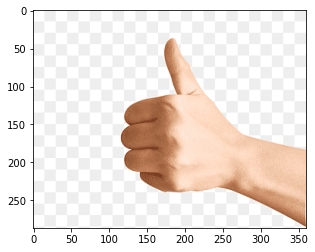

In [49]:
img = cv2.imread("thumbsup.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [50]:
cm


{0: 'v', 1: 'yo', 2: 'palm', 3: 'nameste', 4: 'thumbsup', 5: 'thumbsdown'}

In [51]:
img=tf.io.read_file("thumbsup.png")
img=tf.image.decode_jpeg(img,channels=3)
img=tf.image.resize(img,[32,32])
img = img[np.newaxis, :, :]
print(img.shape)
pred = model.predict(img)
pred_cls = np.argmax(pred)
pred_cls

(1, 32, 32, 3)


2